In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Importando dataset e aplicando threshold binário

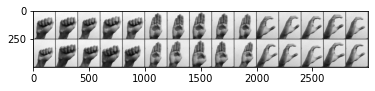

In [2]:
ABC = cv2.imread("datasetABC.jpeg", 0)
plt.imshow(ABC, cmap = 'gray')
plt.show()

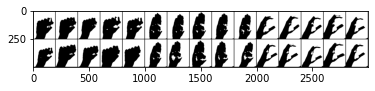

In [3]:
ret, threshABC = cv2.threshold(ABC, 150, 170, cv2.THRESH_BINARY)
plt.imshow(threshABC, cmap = 'gray')
plt.show()

## Divisão da imagem em 15 colunas e 2 linhas com imagens de 250x200

In [4]:
row = [np.vsplit(cells, 2) for cells in np.hsplit(threshABC, 15)]
imagens = np.array(row)
print("Dimensões da variável imagem {}".format(imagens.shape))

Dimensões da variável imagem (15, 2, 250, 200)


## Separação das imagens para treino e para teste, a segunda linha é a de treino e a primeira a de teste, dando 100% de precisão, o inverso fica 93,33% (1 imagem não reconhecida)

## As imagens são reformatadas em um vetor de 50000 pixels

In [5]:
treino = imagens[:,1:].reshape(-1,50000).astype(np.float32) # (15,50000)
teste = imagens[:,:1].reshape(-1,50000).astype(np.float32) # (15,50000)
print("Treino {}  e Teste {}".format(treino.shape, teste.shape))

Treino (15, 50000)  e Teste (15, 50000)


In [6]:
k = np.arange(3)

treino_labels = np.repeat(k,5)[:,np.newaxis]

teste_labels = treino_labels.copy()

print("Sequência {} teve cada elemento repetido 5 vezes".format(k))

print(treino_labels)
print(treino_labels.shape)

Sequência [0 1 2] teve cada elemento repetido 5 vezes
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]]
(15, 1)


## A função np.savez salva a implementação para que o procedimento não seja executado caso o algoritmo seja necessário em outros códigos

In [12]:
np.savez('knn_data_libras.npz',treino=treino, treino_labels=treino_labels)

## Criação da classe knn com os dados de treino, e posteriormente a aplicação com os dados de teste para buscar o(s) vizinho(s) mais próximos

In [7]:
knn = cv2.ml.KNearest_create()
knn.train(treino, cv2.ml.ROW_SAMPLE, treino_labels)
ret, resultado, vizinhos, distancia = knn.findNearest(teste, k=5)

print(resultado.shape)

(15, 1)


In [13]:
with np.load("knn_data_libras.npz") as dados:
    print(dados.files)
    treino_recuperado = dados['treino']
    treino_recuperado_labels = dados['treino_labels']

['treino', 'treino_labels']


Acurácia do algoritmo: 100.0


<function matplotlib.pyplot.show(close=None, block=None)>

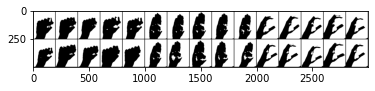

In [8]:
corretos = resultado==teste_labels
quantidade_corretos = np.count_nonzero(corretos)
acuracia = quantidade_corretos*100.0/resultado.size
print("Acurácia do algoritmo: {}".format(acuracia))
plt.imshow(threshABC, cmap = 'gray')
plt.show

## Código que usei para salvar cada imagem separadamente no mesmo tamanho

In [9]:
"""
import numpy as np
import cv2

# Definir area a ser rastreada
x, y, w, h = 30, 80, 200, 250
track_window = (x, y, w, h)

c = 0

camera = cv2.VideoCapture(0)

while True:
    ret, frame = camera.read()

    x,y,w,h = track_window
    imagem = cv2.rectangle(frame, (x,y), (x+w,y+h), 255, 3) #Desenha o retângulo de 200x250
    cv2.imshow('Tracking Window', imagem)

    k = cv2.waitKey(10)

    if k == 32: # barra de espaço salva a imagem
        imagem_cortada = imagem[y:y+h, x:x+w]
        cv2.imwrite("teste_{}.jpeg".format(c), imagem_cortada)
        c = c + 1

    if k == 27: # esc para fechar
        break

camera.release()
cv2.destroyAllWindows()
"""

'\nimport numpy as np\nimport cv2\n\n# Definir area a ser rastreada\nx, y, w, h = 30, 80, 200, 250\ntrack_window = (x, y, w, h)\n\nc = 0\n\ncamera = cv2.VideoCapture(0)\n\nwhile True:\n    ret, frame = camera.read()\n\n    x,y,w,h = track_window\n    imagem = cv2.rectangle(frame, (x,y), (x+w,y+h), 255, 3) #Desenha o retângulo de 200x250\n    cv2.imshow(\'Tracking Window\', imagem)\n\n    k = cv2.waitKey(10)\n\n    if k == 32: # barra de espaço salva a imagem\n        imagem_cortada = imagem[y:y+h, x:x+w]\n        cv2.imwrite("teste_{}.jpeg".format(c), imagem_cortada)\n        c = c + 1\n\n    if k == 27: # esc para fechar\n        break\n\ncamera.release()\ncv2.destroyAllWindows()\n'